In [1]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn import ensemble

### Gradient boost guided example

Now that you've walked through gradient boost by hand, try it with scikit-learn. You'll still use the *European Social Survey* data, but now with a **categorical** outcome: **whether or not someone lives with a partner**.

In [2]:
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

# Define outcome and predictors.
# Set the outcomes to `0` and `1`.
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

# Make the categorical variable `country` into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Create training and test sets.
offset = int(X.shape[0] * 0.8)

# Put 80% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 20% in the test set.
X_test, y_test = X[offset:], y[offset:]

Because you're now working with a binary outcome, you've switched to a classifier. Now your loss function can't be the residuals. Your options are `deviance` and `exponential`. The `deviance` loss function is used for logistic regression, and you'll try that here.

In [3]:
# You'll make 500 iterations, use 2-deep trees, and set your loss function.

# It's best to update this table for the drill
# at the end of the lesson.

params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'log_loss'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

### Evaluation of model: Confusion matrix plot

This plot is based on an example from [scikit-learn's documentation](https://scikit-learn.org/0.18/auto_examples/model_selection/plot_confusion_matrix.html).

In [4]:
def plot_confusion_matrix(cm, classes,normalize,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", verticalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


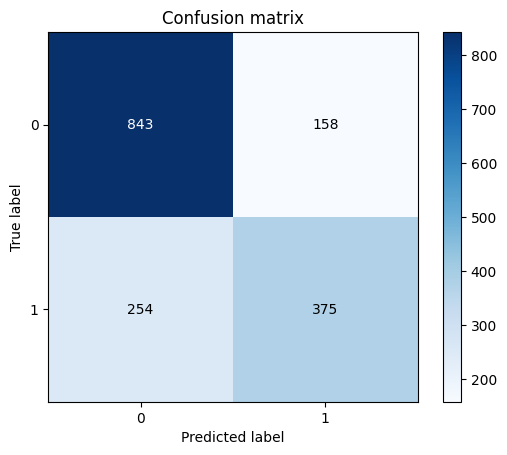

In [5]:
cm = confusion_matrix(y_test, predict_test)
plot_confusion_matrix(cm,[0,1],False)

Normalized confusion matrix


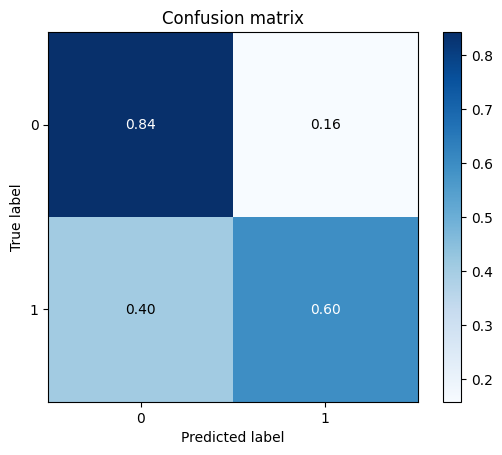

In [6]:
cm = confusion_matrix(y_test, predict_test)
plot_confusion_matrix(cm,[0,1],True)

#### Accuracy

In [7]:
clf.score(X_test, y_test)

0.747239263803681

#### Precision

In [8]:
y_pred = clf.predict(X_test)
precision_score(y_test,y_pred)

0.7035647279549718

#### Recall

In [9]:
recall_score(y_test,y_pred)

0.5961844197138315

#### Type I Errors

In [10]:
table_test = pd.crosstab(y_test, predict_test, margins=True)
test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
print(test_tI_errors)

0.09693251533742331


#### Type II Errors

In [11]:
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']
print(test_tII_errors)

0.1558282208588957


Unlike decision trees, gradient boost solutions aren't terribly easy to interpret on the surface. But they aren't quite black boxes either. You can get a measure of how important various features are by counting how many times a feature is used over the course of many decision trees.

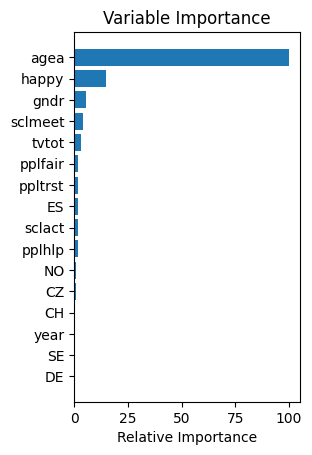

In [12]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

It appears that age and happiness are the most important features in predicting whether or not someone lives with a partner.

### Drill: Improve this gradient boost model

This model is already doing all right, but there is definitely room for improvement. Your task is to see how low you can get the error rates to go in the test set, based on your model in the training set. Here are some strategies that you might use:

* Creating new features
* Applying more overfitting-prevention strategies like subsampling
* Making more iterations
* Trying a different loss function
* Changing the structure of the weak learner by allowing more leaves in the tree or using other modifications

You can learn more about the parameters for the gradient boost model [in scikit-learn's documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html). You can update the *params* table featured earlier, before you initialized and fit the model.

Here are a few of the parameters that you could tune:
 - `learning_rate`
 - `max_depth`
 - `n_estimators`
 - `loss`
 - `subsample`
 - `min_samples_split`

You can then use the same metrics to evaluate your results.
          
Have fun!

Let's first examine our existing dataframe.

In [13]:
df.describe()

,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
count,8.147000e+03,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000
mean,4.022622e+04,6.500307,3.818584,5.574936,6.005155,5.321468,7.708482,5.215908,2.755984,1.496379,47.262182,1.384681
std,6.320721e+05,0.500031,2.008937,2.215745,2.120127,2.166217,1.720839,1.438792,0.901406,0.500018,18.316890,0.486550
min,1.000000e+00,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,1.000000
25%,1.063000e+03,6.000000,2.000000,4.000000,5.000000,4.000000,7.000000,4.000000,2.000000,1.000000,33.000000,1.000000
50%,1.749000e+03,7.000000,4.000000,6.000000,6.000000,5.000000,8.000000,6.000000,3.000000,1.000000,47.000000,1.000000
75%,2.778000e+03,7.000000,5.000000,7.000000,8.000000,7.000000,9.000000,6.000000,3.000000,2.000000,61.000000,2.000000
max,1.100143e+07,7.000000,7.000000,10.000000,10.000000,10.000000,10.000000,7.000000,5.000000,2.000000,114.000000,2.000000


In [14]:
null_count = df.isnull().sum()
null_count[null_count>0]

Series([], dtype: int64)

We can see that all of our features are continuous and that we don't have any nulls. Let's create a new function and then try subsampling.

In [15]:
def run_the_model(params,X_train,X_test,y_train,y_test):
    # Initialize and fit the model.
    clf = ensemble.GradientBoostingClassifier(**params)
    clf.fit(X_train, y_train)

    predict_train = clf.predict(X_train)
    predict_test = clf.predict(X_test)

    # Create accuracy tables.
    table_train = pd.crosstab(y_train, predict_train, margins=True)
    table_test = pd.crosstab(y_test, predict_test, margins=True)

    train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
    train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

    test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
    test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

    train_accuracy = clf.score(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    train_precision = precision_score(y_train,y_pred_train)
    train_recall = recall_score(y_train,y_pred_train)

    test_accuracy = clf.score(X_test, y_test)
    y_pred = clf.predict(X_test)
    test_precision = precision_score(y_test,y_pred)
    test_recall = recall_score(y_test,y_pred)

    print((
        'Training set accuracy:\n'
        'Training accuracy: {}\n'
        'Training precision: {}\n'
        'Training recall: {}\n'
        'Percent Type I errors: {}\n'
        'Percent Type II errors: {}\n\n'
        'Test set accuracy:\n'
        'Test accuracy: {}\n'
        'Test precision: {}\n'
        'Test recall: {}\n'
        'Percent Type I errors: {}\n'
        'Percent Type II errors: {}'
    ).format(train_accuracy,train_precision,train_recall,train_tI_errors,train_tII_errors,
             test_accuracy,test_precision,test_recall,test_tI_errors, test_tII_errors))

In [16]:
# Subsampling
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'log_loss',
          'random_state': 99,
          'subsample': .8,} # Use Stochastic Gradient Boosting
clf = ensemble.GradientBoostingClassifier(**params)
run_the_model(params,X_train,X_test,y_train,y_test)

Training set accuracy:
Training accuracy: 0.7801135491790702
Training precision: 0.8217286914765907
Training recall: 0.5465069860279441
Percent Type I errors: 0.04557311646463096
Percent Type II errors: 0.17431333435629892

Test set accuracy:
Test accuracy: 0.7392638036809815
Test precision: 0.6841155234657039
Test recall: 0.6025437201907791
Percent Type I errors: 0.10736196319018405
Percent Type II errors: 0.15337423312883436


We can see a slight improvement in recall for our Test set. However, the errors, accuracy, and precision are similar as above. Instead of "manually" testing all of the other parameters, let's take advantage of [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [17]:
# n_estimators and max_depth
from sklearn.model_selection import GridSearchCV
params = {'n_estimators': range(50,500,50),
          'max_depth': [2,4]}

clf = ensemble.GradientBoostingClassifier(loss='log_loss',random_state=99)
gscv = GridSearchCV(clf,params,cv=5)
gscv.fit(X,y)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=99),
             param_grid={'max_depth': [2, 4],
                         'n_estimators': range(50, 500, 50)})

In [18]:
# Look at scores
gscv.best_params_, gscv.best_score_

({'max_depth': 4, 'n_estimators': 50}, 0.750829783788466)

In [19]:
# learning_rate and loss
params = {'learning_rate': [x/10 for x in range(1,11,1)],
          'loss': ['log_loss','exponential']}

clf = ensemble.GradientBoostingClassifier(max_depth=4,n_estimators=50,random_state=99)
gscv = GridSearchCV(clf,params,cv=5)
gscv.fit(X,y)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(max_depth=4, n_estimators=50,
                                                  random_state=99),
             param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                           0.8, 0.9, 1.0],
                         'loss': ['log_loss', 'exponential']})

In [20]:
# Look at scores
gscv.best_params_, gscv.best_score_

({'learning_rate': 0.1, 'loss': 'exponential'}, 0.7518119061338396)

In [21]:
# subsample and min_samples_split
params = {'subsample': [x/20 for x in range(10,20,1)],
          'min_samples_split': [2**x for x in range(1,9)]}

clf = ensemble.GradientBoostingClassifier(max_depth=4,n_estimators=50,learning_rate=0.1,loss='exponential',random_state=99)
gscv = GridSearchCV(clf,params,cv=5)
gscv.fit(X,y)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(loss='exponential',
                                                  max_depth=4, n_estimators=50,
                                                  random_state=99),
             param_grid={'min_samples_split': [2, 4, 8, 16, 32, 64, 128, 256],
                         'subsample': [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8,
                                       0.85, 0.9, 0.95]})

In [22]:
# Look at scores
gscv.best_params_, gscv.best_score_

({'min_samples_split': 32, 'subsample': 0.9}, 0.75291687850953)

In [37]:
# These are reasonably good parameters.
params = {'loss': 'log_loss', # we should be using log_loss
          'random_state': 99,
          'max_depth': 4,
          'n_estimators': 50,
          'learning_rate': 0.1,
          'subsample': 0.9,
          'min_samples_split': 32,
         }
clf = ensemble.GradientBoostingClassifier(**params)
run_the_model(params,X_train,X_test,y_train,y_test)

Training set accuracy:
Training accuracy: 0.7782722111400951
Training precision: 0.8437094682230869
Training recall: 0.5193612774451097
Percent Type I errors: 0.03698020561608102
Percent Type II errors: 0.18474758324382384

Test set accuracy:
Test accuracy: 0.7588957055214723
Test precision: 0.7633928571428571
Test recall: 0.5437201907790143
Percent Type I errors: 0.06503067484662577
Percent Type II errors: 0.17607361963190185


We see significantly better accuracy, recall, and precision. We can also verify that the confusion matrix more accurately predicts the correct classes.

Confusion matrix, without normalization


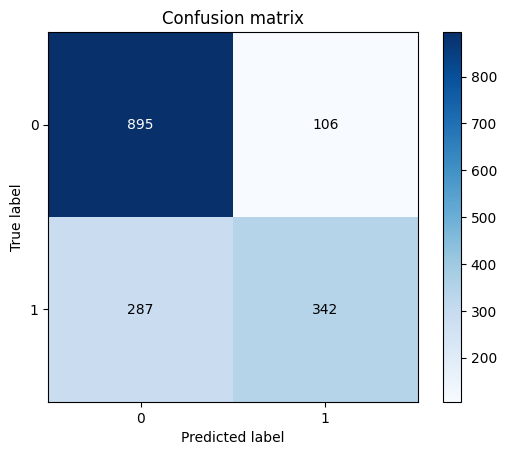

In [39]:
clf.fit(X_train, y_train)
predict_test = clf.predict(X_test)
cm = confusion_matrix(y_test, predict_test)
plot_confusion_matrix(cm,[0,1],False)

Normalized confusion matrix


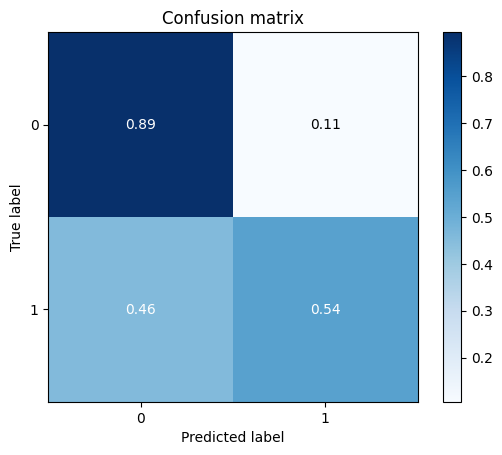

In [40]:
cm = confusion_matrix(y_test, predict_test)
plot_confusion_matrix(cm,[0,1],True)